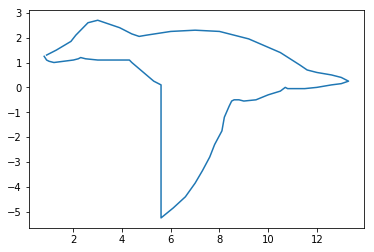

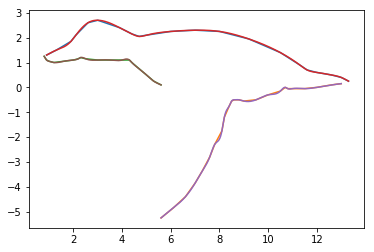

28.79321908027542


In [2]:
#on my first upload, I had an error in the section where I did trap rule. I have corrected it here.









import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapz


#The list of numbers
xi=np.array([0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.,7.,8.,9.2,10.5,11.3,11.6,12.,12.6,13.,13.3,13.,12.6,12.3,12.0,11.5,11.,10.8,10.7,10.5,10.,9.5,9.,8.8,8.6,8.5,8.4,8.2,8.1,7.8,7.6,7.3,7.,6.6,6.1,5.6,5.6,5.3,5.,4.7,4.4,4.3,4.,3.5,3.,2.5,2.3,2.2,2.,1.6,1.2,1.,.9,.8])
yi=np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,.9,.7,.6,.5,.4,.25,.15,.1,.05,0.,-.05,-.05,-.05,0.,-0.15,-.3,-.5,-.55,-.5,-.5,-.55,-.75,-1.2,-1.75,-2.3,-2.8,-3.35,-3.85,-4.4,-4.85,-5.25,.1,.25,.5,.75,1.,1.1,1.1,1.1,1.1,1.15,1.2,1.15,1.1,1.05,1.,1.05,1.1,1.25])

plt.plot(xi,yi)
plt.show()



#I chose to break the interpolation into 3 pieces. This is because it clearly becomes non-continuous at three spots
y1=np.array([])
x1=np.array([])
test=xi[0]
it=0
while True:
    if xi[it]>=test:
        y1=np.append(y1, yi[it])
        x1=np.append(x1, xi[it])
        test=xi[it]
        it+=1
    else:
        break

y2=np.array([])
x2=np.array([])                
while xi[it]!=5.6:
    y2=np.append(y2, yi[it])
    x2=np.append(x2, xi[it])
    it+=1
y2=np.append(y2, yi[it])
x2=np.append(x2, xi[it])
it+=1

y3=np.array([])
x3=np.array([])
while it<xi.size:
    y3=np.append(y3, yi[it])
    x3=np.append(x3, xi[it])
    it+=1

#This section here flips the array of the negative segments so that the x values are in increasing order.    
x2new=np.array([])
y2new=np.array([])
x3new=np.array([])
y3new=np.array([])
for i in range(0,x2.size):
    x2new=np.append(x2new,x2[x2.size-i-1])
    y2new=np.append(y2new,y2[y2.size-i-1])
for i in range(0,x3.size):
    x3new=np.append(x3new,x3[x3.size-i-1])
    y3new=np.append(y3new,y3[y3.size-i-1])
x2=x2new
y2=y2new
x3=x3new
y3=y3new

    

#This creates an interpolation with 1000 points using Cubic Spline. I tried multiple different interpolations from the 
#scipy library and cubic spline looked the best
xp1 = np.linspace(x1.min(), x1.max(), 1000)
yp1 = CubicSpline(x1, y1, bc_type="natural")
xp2 = np.linspace(x2.min(), x2.max(), 1000)
yp2 = CubicSpline(x2, y2, bc_type='natural')
xp3 = np.linspace(x3.min(), x3.max(), 1000)
yp3 = CubicSpline(x3, y3, bc_type='natural')


#This uses the trapezoid rule for integration the function
total=trapz(yp1(xp1),xp1)
total-=trapz(yp2(xp2),xp2)
total-=trapz(yp3(xp3),xp3)



    
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(xp1,yp1(xp1))
plt.plot(xp2,yp2(xp2))
plt.plot(xp3,yp3(xp3))
plt.show()


print(total)
